Figure saved as hysteresis_plot.pdf


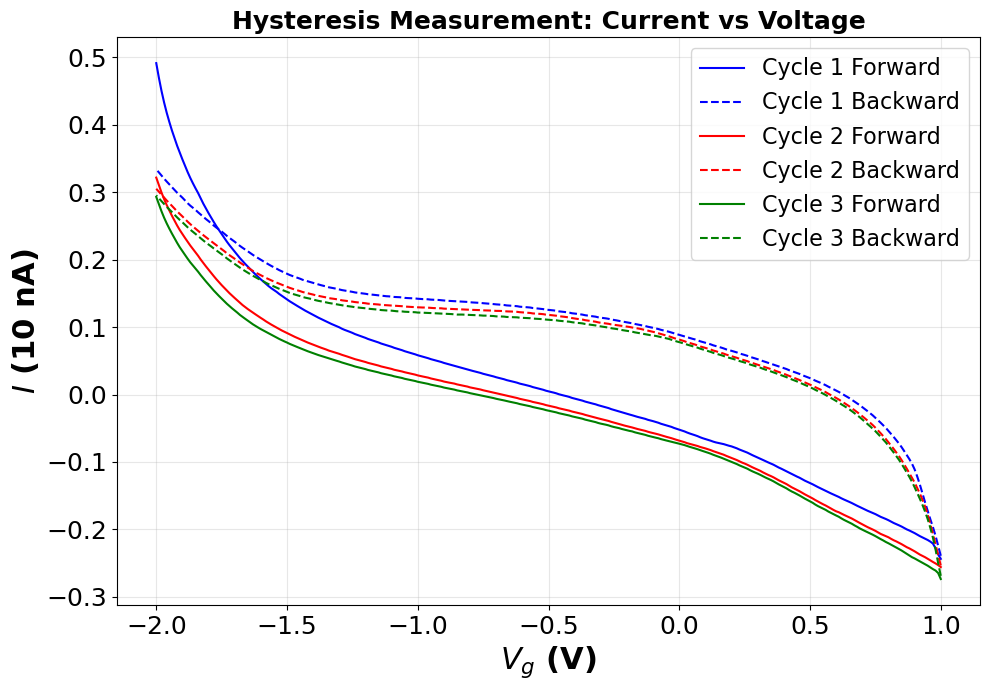

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Read the data file
filename = 'hysteresis_measurement_data_20250721_122127.txt'

# Initialize lists to store data for each cycle
cycles = {'Cycle 1': {'Forward': {'V1': [], 'I': []}, 'Backward': {'V1': [], 'I': []}},
          'Cycle 2': {'Forward': {'V1': [], 'I': []}, 'Backward': {'V1': [], 'I': []}},
          'Cycle 3': {'Forward': {'V1': [], 'I': []}, 'Backward': {'V1': [], 'I': []}}}

# Read and parse the file
with open(filename, 'r') as f:
    current_cycle = None
    for line in f:
        line = line.strip()
        
        # Skip empty lines and comments
        if not line or line.startswith('#'):
            # Check for cycle markers
            if '=== Cycle 1 ===' in line:
                current_cycle = 'Cycle 1'
            elif '=== Cycle 2 ===' in line:
                current_cycle = 'Cycle 2'
            elif '=== Cycle 3 ===' in line:
                current_cycle = 'Cycle 3'
            continue
        
        # Parse data lines
        if current_cycle:
            parts = line.split(',')
            if len(parts) == 3:
                direction = parts[0].strip()
                v1 = float(parts[1].strip())
                i = float(parts[2].strip())
                
                if direction in ['Forward', 'Backward']:
                    cycles[current_cycle][direction]['V1'].append(v1)
                    cycles[current_cycle][direction]['I'].append(i)

# Create the plot
plt.figure(figsize=(10, 7))

# Define colors for each cycle
colors = {'Cycle 1': 'blue', 'Cycle 2': 'red', 'Cycle 3': 'green'}

# Plot each cycle
for cycle_name, cycle_data in cycles.items():
    # Plot forward sweep
    plt.plot(cycle_data['Forward']['V1'], cycle_data['Forward']['I'], 
             color=colors[cycle_name], linestyle='-', linewidth=1.5,
             label=f'{cycle_name} Forward')
    
    # Plot backward sweep
    plt.plot(cycle_data['Backward']['V1'], cycle_data['Backward']['I'], 
             color=colors[cycle_name], linestyle='--', linewidth=1.5,
             label=f'{cycle_name} Backward')

# Customize the plot
plt.xlabel('$V_g$ (V)', fontsize=22, fontweight='bold')
plt.ylabel('$I$ (10 nA)', fontsize=22, fontweight='bold')
plt.title('Hysteresis Measurement: Current vs Voltage', fontsize=18, fontweight='bold')
plt.legend(fontsize=16, loc='best')
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', labelsize=18)

# Make layout tight
plt.tight_layout()

# Save the figure as PDF
output_filename = 'hysteresis_plot.pdf'
plt.savefig(output_filename, format='pdf', dpi=300, bbox_inches='tight')
print(f"Figure saved as {output_filename}")

plt.show()